## a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from torch.distributed.pipeline.sync.microbatch import scatter

np.random.seed(43823858)


In [29]:
def f1(t):
    return np.sin(t) + np.random.normal() * 0.001


def f2(t):
    return 2 * (t - np.floor(t)) + np.random.normal() * 0.002


def f3(t):
    return 0.01 * t + np.random.normal() * 0.001

funcs = [f1, f2, f3]

A = np.random.uniform(size=(3, 3))

def x(t):
    vals = np.array([f(t) for f in funcs])
    return A.dot(vals)

    


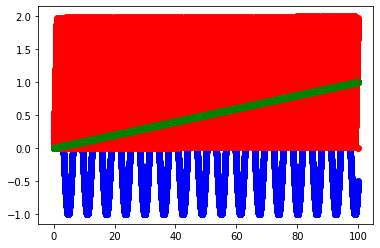

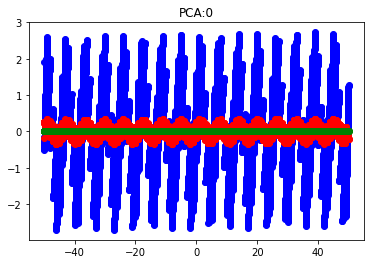

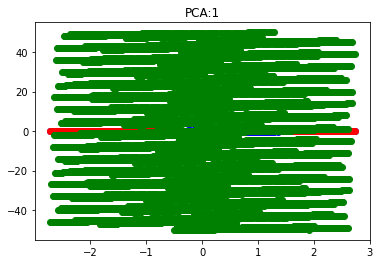

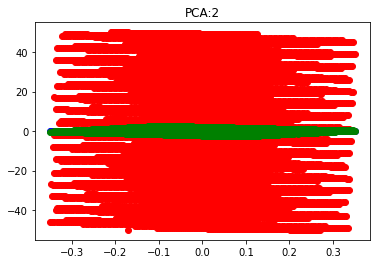

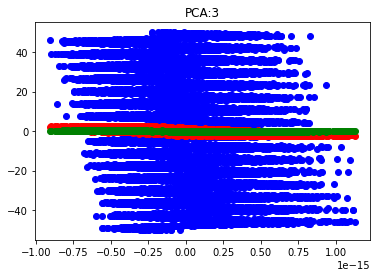

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


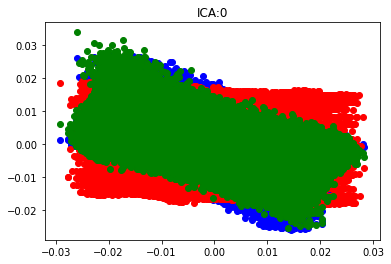

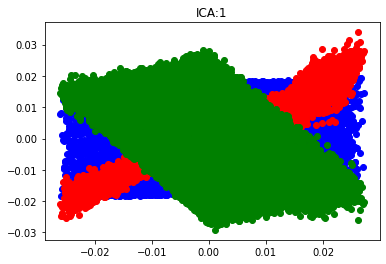

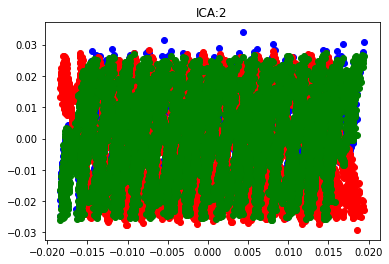

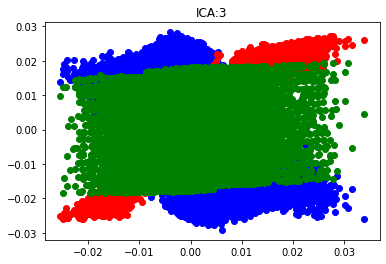

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


20.709476327336976
-12.92476069365491


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [62]:
lin = np.linspace(0, 100, 10000)
tx = np.concatenate((lin[np.newaxis].transpose(), x(lin).transpose()), axis=1)


fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(lin, f1(lin), color='b', label='f1')
ax.scatter(lin, f2(lin), color='r', label='f2')
ax.scatter(lin, f3(lin), color='g', label='f3')
plt.show()

pca = PCA().fit(tx).transform(tx)
for i in range(pca.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(pca[:, (0+i)%4], pca[:, (1+i)%4], color='b', label='f1')
    ax.scatter(pca[:, (0+i)%4], pca[:, (2+i)%4], color='r', label='f2')
    ax.scatter(pca[:, (0+i)%4], pca[:, (3+i)%4], color='g', label='f3')
    ax.title.set_text('PCA:' + str(i))
plt.show()



pca = FastICA().fit(tx).transform(tx)
for i in range(pca.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(pca[:, (0+i)%4], pca[:, (1+i)%4], color='b', label='f1')
    ax.scatter(pca[:, (0+i)%4], pca[:, (2+i)%4], color='r', label='f2')
    ax.scatter(pca[:, (0+i)%4], pca[:, (3+i)%4], color='g', label='f3')
    ax.title.set_text('ICA:' + str(i))
plt.show()

tx_pca = PCA().fit(tx).inverse_transform(tx)
print(np.mean(tx_pca - tx))
tx_ica = FastICA().fit(tx).inverse_transform(tx)
print(np.mean(tx_ica - tx))



In [2]:
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

_, (test_x, test_y) = mnist.load_data()
test_x = test_x.reshape(10000, 784)

#print(KNeighborsClassifier(n_neighbors=10, metric='minkowski').fit(train_x, train_y).score(train_x, train_y))
# 0.9665

mnist_pca = PCA(n_components=2).fit_transform(test_x)
print(KNeighborsClassifier(n_neighbors=7, metric='minkowski').fit(mnist_pca, test_y).score(mnist_pca, test_y))
# 0.5704

mnist_LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=5, random_state=0).fit_transform(test_x)
print(KNeighborsClassifier(n_neighbors=7, metric='minkowski').fit(mnist_LLE, test_y).score(mnist_LLE, test_y))
# 0.8902

mnist_isomap = Isomap(n_components=2, n_neighbors=5).fit_transform(test_x)
print(KNeighborsClassifier(n_neighbors=7, metric='minkowski').fit(mnist_isomap, test_y).score(mnist_isomap, test_y))
# 0.6637


2024-11-13 21:57:38.613051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-13 21:57:38.613071: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


0.5704
0.8902
0.6637


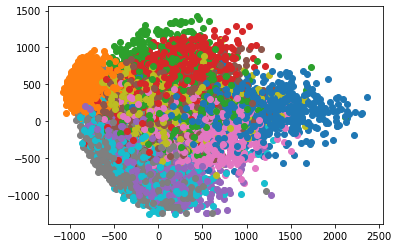

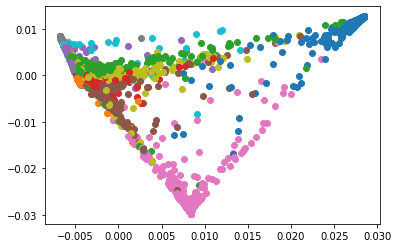

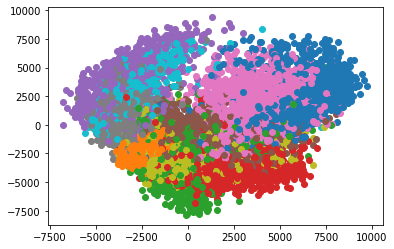

In [3]:
import matplotlib.colors as mcolors
fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(mnist_pca)):
    ax.scatter(mnist_pca[i,0], mnist_pca[i,1], color = list(mcolors.TABLEAU_COLORS.keys())[test_y[i]])
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(mnist_LLE)):
    ax.scatter(mnist_LLE[i, 0], mnist_LLE[i, 1], color=list(mcolors.TABLEAU_COLORS.keys())[test_y[i]])
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(mnist_isomap)):
    ax.scatter(mnist_isomap[i, 0], mnist_isomap[i, 1], color=list(mcolors.TABLEAU_COLORS.keys())[test_y[i]])
plt.show()

